In [1]:
# import all libraries and modules
import tensorflow as tf 
import pandas as pd  
import numpy as np    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
fn = '/home/jefire/project/water/input/jide_q_h_data/jiderebode_q_imerge_data_2000_2021.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-53,Rt-198,Tt,Tt-128,Tavgt-5,Tavgt-218,Q
0,2000-12-15,1.483530,806.217080,20.548630,29.454124,21.124511,29.181991,1643.70
1,2000-12-16,1.202289,804.295069,20.831886,28.359922,20.968059,29.129941,1646.12
2,2000-12-17,0.972571,803.990159,21.233590,29.549215,20.908853,29.079552,1653.02
3,2000-12-18,0.024893,797.903900,21.998173,30.130972,21.073988,29.031691,1654.00
4,2000-12-19,0.024559,785.443950,22.164326,30.165789,21.355321,28.985602,1655.49
...,...,...,...,...,...,...,...,...
7590,2021-09-26,16.521097,850.447905,31.067743,34.135807,30.547154,31.290123,2577.12
7591,2021-09-27,12.976256,851.271419,30.464815,34.440166,30.576849,31.318884,2546.40
7592,2021-09-28,3.499565,851.689424,30.405666,34.654995,30.686144,31.347105,2495.20
7593,2021-09-29,12.751515,856.229945,30.473732,34.584763,30.650376,31.375554,2444.00


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-53,Rt-198,Tt,Tt-128,Tavgt-5,Tavgt-218,Q
0,2000-12-15,1.483530,806.217080,20.548630,29.454124,21.124511,29.181991,1643.70
1,2000-12-16,1.202289,804.295069,20.831886,28.359922,20.968059,29.129941,1646.12
2,2000-12-17,0.972571,803.990159,21.233590,29.549215,20.908853,29.079552,1653.02
3,2000-12-18,0.024893,797.903900,21.998173,30.130972,21.073988,29.031691,1654.00
4,2000-12-19,0.024559,785.443950,22.164326,30.165789,21.355321,28.985602,1655.49
...,...,...,...,...,...,...,...,...
7590,2021-09-26,16.521097,850.447905,31.067743,34.135807,30.547154,31.290123,2577.12
7591,2021-09-27,12.976256,851.271419,30.464815,34.440166,30.576849,31.318884,2546.40
7592,2021-09-28,3.499565,851.689424,30.405666,34.654995,30.686144,31.347105,2495.20
7593,2021-09-29,12.751515,856.229945,30.473732,34.584763,30.650376,31.375554,2444.00


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-53,Rt-198,Tt,Tt-128,Tavgt-5,Tavgt-218,Q
0,2000-12-15,1.483530,806.217080,20.548630,29.454124,21.124511,29.181991,1643.70
1,2000-12-16,1.202289,804.295069,20.831886,28.359922,20.968059,29.129941,1646.12
2,2000-12-17,0.972571,803.990159,21.233590,29.549215,20.908853,29.079552,1653.02
3,2000-12-18,0.024893,797.903900,21.998173,30.130972,21.073988,29.031691,1654.00
4,2000-12-19,0.024559,785.443950,22.164326,30.165789,21.355321,28.985602,1655.49
...,...,...,...,...,...,...,...,...
7590,2021-09-26,16.521097,850.447905,31.067743,34.135807,30.547154,31.290123,2577.12
7591,2021-09-27,12.976256,851.271419,30.464815,34.440166,30.576849,31.318884,2546.40
7592,2021-09-28,3.499565,851.689424,30.405666,34.654995,30.686144,31.347105,2495.20
7593,2021-09-29,12.751515,856.229945,30.473732,34.584763,30.650376,31.375554,2444.00


In [8]:
# get summary statistics
df_copy.describe()

,Pt-53,Rt-198,Tt,Tt-128,Tavgt-5,Tavgt-218,Q
count,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000
mean,2.663544,528.513618,28.670245,28.610967,28.667863,28.618846,1282.063716
std,4.026123,333.836456,3.948918,3.946075,3.891364,1.706119,939.222189
min,0.000000,30.828228,16.909994,16.909994,17.671531,25.574369,0.000000
25%,0.024480,185.362190,26.032459,25.941912,26.050730,27.096467,297.580000
50%,0.630830,549.780299,29.642730,29.570566,29.739219,28.402247,1501.560000
75%,3.855986,843.763577,31.501561,31.448205,31.405161,30.261906,1854.575000
max,26.368990,1118.552856,35.947914,35.947914,35.587638,31.596457,5388.920000


In [9]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-9-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7595
unique                   7595
top       2000-12-15 00:00:00
freq                        1
first     2000-12-15 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [10]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-53,Rt-198,Tt,Tt-128,Tavgt-5,Tavgt-218,Q
date,,,,,,,
2000-12-15,1.483530,806.217080,20.548630,29.454124,21.124511,29.181991,1643.70
2000-12-16,1.202289,804.295069,20.831886,28.359922,20.968059,29.129941,1646.12
2000-12-17,0.972571,803.990159,21.233590,29.549215,20.908853,29.079552,1653.02
2000-12-18,0.024893,797.903900,21.998173,30.130972,21.073988,29.031691,1654.00
2000-12-19,0.024559,785.443950,22.164326,30.165789,21.355321,28.985602,1655.49
...,...,...,...,...,...,...,...
2021-09-26,16.521097,850.447905,31.067743,34.135807,30.547154,31.290123,2577.12
2021-09-27,12.976256,851.271419,30.464815,34.440166,30.576849,31.318884,2546.40
2021-09-28,3.499565,851.689424,30.405666,34.654995,30.686144,31.347105,2495.20


In [12]:
# drop unwanted dates data
df_copy.drop(df_copy.loc['2000-12-15':'2000-12-31'].index,inplace=True)
df_copy.drop(df_copy.loc['2020-03-02':].index,inplace=True) 
df_copy

,Pt-53,Rt-198,Tt,Tt-128,Tavgt-5,Tavgt-218,Q
date,,,,,,,
2001-01-01,0.271963,728.114131,21.818512,29.886585,22.134039,28.317705,1710.00
2001-01-02,0.582003,724.443817,21.694710,29.683380,21.929688,28.265051,1714.40
2001-01-03,1.788836,721.460727,21.706347,30.388618,21.810697,28.208754,1718.00
2001-01-04,0.833609,717.646133,21.556520,30.492870,21.699811,28.154916,1722.28
2001-01-05,0.299480,711.444725,21.191872,30.478231,21.593592,28.103509,1725.98
...,...,...,...,...,...,...,...
2020-02-26,0.001097,466.697622,24.694689,30.047571,25.702100,26.936838,1691.40
2020-02-27,0.000605,461.196139,25.625881,30.938284,25.483558,26.919160,1683.80
2020-02-28,0.000413,453.708918,26.509964,30.924395,25.377235,26.903049,1661.00


In [13]:
# split data 70 : 15 : 15 (train, val, test)
# size = int(len(df_copy)*0.8)
size = int(len(df_copy)*0.85)

df_train_val = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

print(df_train_val.head())
print(df_test.head())
print(len(df_train_val))
print(len(df_test))

               Pt-53      Rt-198         Tt     Tt-128    Tavgt-5  Tavgt-218  \
date                                                                           
2001-01-01  0.271963  728.114131  21.818512  29.886585  22.134039  28.317705   
2001-01-02  0.582003  724.443817  21.694710  29.683380  21.929688  28.265051   
2001-01-03  1.788836  721.460727  21.706347  30.388618  21.810697  28.208754   
2001-01-04  0.833609  717.646133  21.556520  30.492870  21.699811  28.154916   
2001-01-05  0.299480  711.444725  21.191872  30.478231  21.593592  28.103509   

                  Q  
date                 
2001-01-01  1710.00  
2001-01-02  1714.40  
2001-01-03  1718.00  
2001-01-04  1722.28  
2001-01-05  1725.98  
               Pt-53     Rt-198         Tt     Tt-128    Tavgt-5  Tavgt-218  \
date                                                                          
2017-04-17  0.119679  56.709845  30.627996  24.541441  30.057551  27.022768   
2017-04-18  0.145656  54.841153  31.263472  24.8

In [14]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,6))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,6))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_train_val.iloc[:,:-1])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 6, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 6, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_train_val.iloc[:,:-1])
print(dataX[0])
print(dataX.shape)

[-0.18956547  0.34056151 -1.37952518  0.10628583 -1.33135222 -0.00140128]
(5950, 6)


In [19]:
scaler = StandardScaler()
scaler.fit(df_train_val[['Q']])

StandardScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_train_val[['Q']])
dataY[0]

array([0.57962369])

In [21]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 30
horizon = 1
TRAIN_SPLIT = len(df_train_val) - len(df_test)  
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[-1.89565474e-01  3.40561513e-01 -1.37952518e+00  1.06285826e-01
  -1.33135222e+00 -1.40127875e-03]
 [-1.88116352e-02  3.29508349e-01 -1.41898100e+00  3.82368381e-02
  -1.37475302e+00 -1.97821703e-02]
 [ 3.35412946e-01  3.23526354e-01 -1.41373871e+00  3.01298426e-01
  -1.40394549e+00 -3.96808702e-02]
 [ 8.90919533e-02  3.15289368e-01 -1.45019173e+00  3.43526811e-01
  -1.43856572e+00 -5.99957970e-02]
 [-1.68543999e-01  3.02942178e-01 -1.53524304e+00  3.38319510e-01
  -1.47150221e+00 -7.81187300e-02]
 [-1.13321030e-01  2.91804780e-01 -1.59917176e+00  2.51810378e-01
  -1.50950496e+00 -1.01260634e-01]
 [-2.69496422e-01  2.79831317e-01 -1.51771949e+00  2.65005130e-01
  -1.52669301e+00 -1.22534369e-01]
 [-5.47914448e-01  2.77318155e-01 -1.45029044e+00  7.17146016e-01
  -1.53442157e+00 -1.42121802e-01]
 [-1.56026337e-01  2.69397456e-01 -1.41082164e+00  7.58553248e-01
  -1.52637962e+00 -1.61733170e-01]
 [-5.76044386e-01  2.60899416e-01 -1.32689397e+00  4.10600163

In [22]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(4870, 2, 1, 15, 6)
(1019, 2, 1, 15, 6)


In [23]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='tanh', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='relu'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [25]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ConvLSTM_Multi_Jiderebode_Q_1step_30days_gpm_2001_2020_tanh.h5'

In [26]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 17s 31ms/step - loss: 0.2888 - val_loss: 0.1885
Epoch 2/100
150/150 [==============================] - 2s 16ms/step - loss: 0.1703 - val_loss: 0.1574
Epoch 3/100
150/150 [==============================] - 2s 16ms/step - loss: 0.1277 - val_loss: 0.1495
Epoch 4/100
150/150 [==============================] - 2s 15ms/step - loss: 0.1080 - val_loss: 0.1342
Epoch 5/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0942 - val_loss: 0.1327
Epoch 6/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0854 - val_loss: 0.1295
Epoch 7/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0818 - val_loss: 0.1269
Epoch 8/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0756 - val_loss: 0.1251
Epoch 9/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0769 - val_loss: 0.1254
Epoch 10/100
150/150 [==============================] - 2s 16ms/step - loss: 0.06

In [27]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

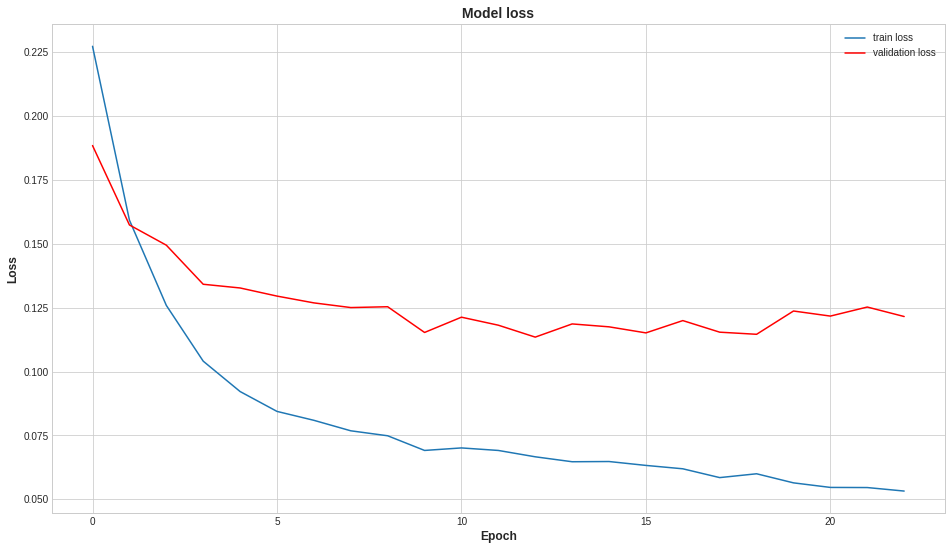

<Figure size 1152x648 with 0 Axes>

In [28]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [29]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 13, 64)         54016     
_________________________________________________________________
dropout (Dropout)            (None, 1, 13, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 832)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                24990     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 79,037
Trainable params: 79,037
Non-trainable params: 0
____________________________________________________

In [30]:
# assign the number of days to validate model
val_period = len(df_test) - hist_window - horizon
val_period

1019

In [31]:
# hold back 5 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test.iloc[:,:].tail(val_period)

In [32]:
# apply transform to test dataset
validateX = pipe.transform(df_test.iloc[:,:-1])

print(validateX[0])
print(validateX.shape)

[-0.37031538 -1.9681195   0.39488514 -0.89826299  0.16540218 -0.68183191]
(1050, 6)


In [33]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([-1.2802926])

In [34]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[-0.37031538 -1.9681195   0.39488514 -0.89826299  0.16540218 -0.68183191]
 [-0.33305666 -2.08400612  0.62576648 -0.86019906  0.28497896 -0.68011889]
 [-0.43749631 -2.1394614   0.84121012 -0.85940139  0.48495529 -0.6697047 ]
 [-0.53364358 -2.15586991  1.05786947 -0.79574299  0.67113156 -0.66072221]
 [-0.48480074 -2.15204979  1.13736613 -0.78574199  0.81887064 -0.65235408]
 [-0.79389849 -2.14972088  1.07167377 -0.92150597  0.93647801 -0.64434224]
 [-1.20474217 -2.23290412  1.15716988 -1.04036506  1.04498562 -0.63878855]
 [-1.11001098 -2.22393961  1.44449442 -1.01234588  1.17553554 -0.63063704]
 [-1.1906165  -2.42939294  1.86487043 -0.93219283  1.33582592 -0.61688117]
 [-1.64509293 -2.30530534  1.6634112  -0.87890943  1.46342588 -0.60017758]
 [-1.43867521 -2.29340717  1.7860191  -0.8405774   1.66604823 -0.57776544]
 [-1.02673727 -2.19741063  1.8885204  -0.83475207  1.88162779 -0.56006315]
 [-0.68823218 -2.24109022  1.99206257 -0.88403246  2.00435523 -0.54263

In [35]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_ConvLSTM.shape)

(1019, 2, 1, 15, 6)


In [36]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.1566472]]


In [37]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [38]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[185.55086]
(1019, 1)


In [39]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.84029045]
KGE' is : [0.86807998]
r is : [0.93237899], gamma is : [0.95600785]
KGE is : [0.8098946]
alpha is : [0.85622072], beta is : [0.89562097]
PBIAS is : [10.43790274]
RMSE is : 409.28196128631134
MARE is : [0.20596691]
MSE is : 167511.72383436965
MAE is : 308.0774362026366
MAPE is : inf
R2 is : 0.8402904510335487



<ipython-input-39-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


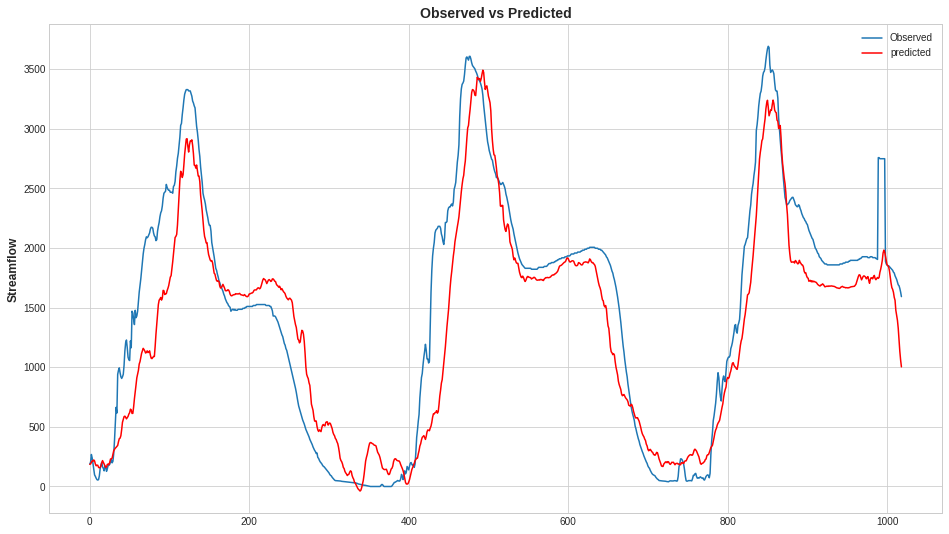

<Figure size 1152x648 with 0 Axes>

In [40]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow",size=12,fontweight='semibold')
plt.legend(('Observed','predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [41]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ConvLSTM_Multi_Jiderebode_Q_1step_30days_gpm_tanh_history.csv', index=False)

In [42]:
# Hybrid CNN LSTM

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [43]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(4870, 2, 15, 6)
(1019, 2, 15, 6)


In [44]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [45]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='tanh'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [46]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_LSTM_Multi_Jiderebode_Q_1step_30days_gpm_tanh.h5'

In [47]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 5s 15ms/step - loss: 0.2882 - val_loss: 0.1722
Epoch 2/100
150/150 [==============================] - 1s 5ms/step - loss: 0.1378 - val_loss: 0.1431
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.1082 - val_loss: 0.1274
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0861 - val_loss: 0.1237
Epoch 5/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0773 - val_loss: 0.1254
Epoch 6/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0685 - val_loss: 0.1247
Epoch 7/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0629 - val_loss: 0.1282
Epoch 8/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0566 - val_loss: 0.1244
Epoch 9/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0532 - val_loss: 0.1198
Epoch 10/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0474 - val_l

In [48]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

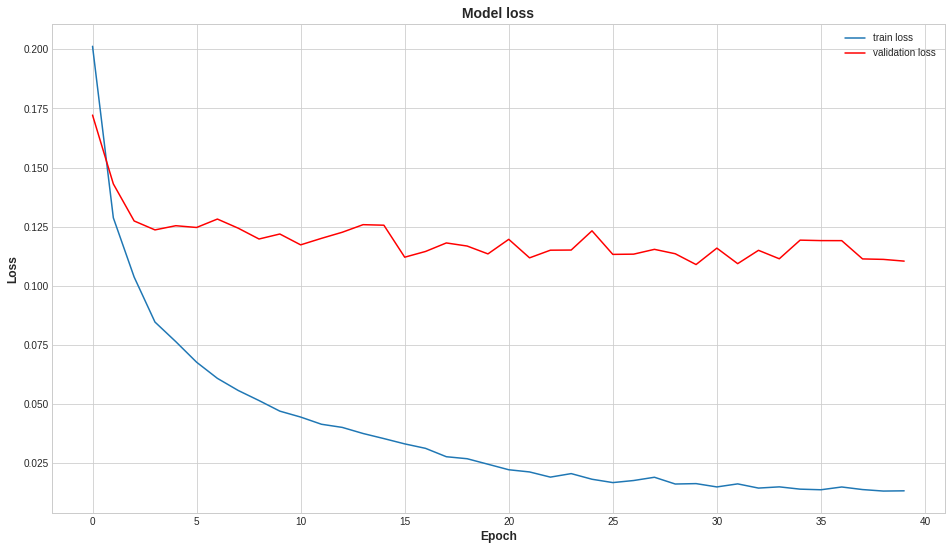

<Figure size 1152x648 with 0 Axes>

In [49]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [50]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 13, 64)         1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 384)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               194000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [51]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)
print(len(x_test_multi_CNN_LSTM))

(1019, 2, 15, 6)
1019


In [52]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.2570184]]


In [53]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [54]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[97.42476]
(1019, 1)


In [55]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81649727]
KGE' is : [0.85394274]
r is : [0.92341895], gamma is : [0.97809134]
KGE is : [0.79771776]
alpha is : [0.85834771], beta is : [0.87757419]
PBIAS is : [12.24258059]
RMSE is : 438.7108999751061
MARE is : [0.21540273]
MSE is : 192467.25375696752
MAE is : 322.1911678614299
MAPE is : inf
R2 is : 0.8164972720432964



<ipython-input-55-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


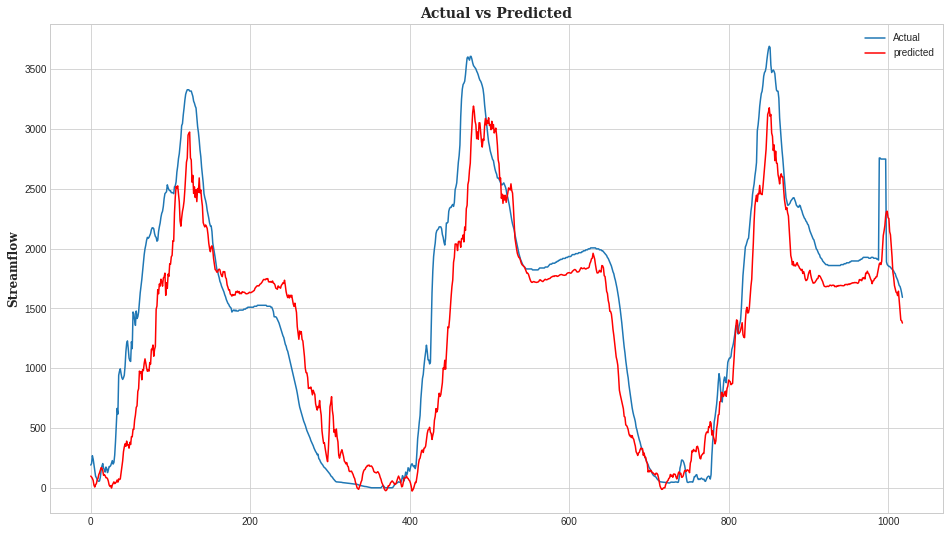

<Figure size 1152x648 with 0 Axes>

In [56]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted",size=14,fontweight='bold',family='serif')
plt.ylabel("Streamflow",size=12,fontweight='semibold',family='serif')
plt.legend(('Actual','predicted'))  # plt.legend(('Actual','predicted'), loc=' upper left ')
plt.figure(figsize=(16,9))
plt.show()

In [57]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_LSTM_Multi_Jiderebode_Q_1step_30days_gpm_tanh_history.csv', index=False)

In [58]:
# Hybrid CNN GRU

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [59]:
# tensorflow version
tf.__version__

'2.4.1'

In [60]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(4870, 2, 15, 6)
(1019, 2, 15, 6)
1019


In [61]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [62]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='tanh'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [63]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_GRU_Multi_Jiderebode_Q_1step_30days_gpm_tanh.h5'

In [64]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 3s 10ms/step - loss: 0.3280 - val_loss: 0.1976
Epoch 2/100
150/150 [==============================] - 1s 8ms/step - loss: 0.1530 - val_loss: 0.1489
Epoch 3/100
150/150 [==============================] - 1s 8ms/step - loss: 0.1121 - val_loss: 0.1389
Epoch 4/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0928 - val_loss: 0.1293
Epoch 5/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0842 - val_loss: 0.1339
Epoch 6/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0751 - val_loss: 0.1315
Epoch 7/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0711 - val_loss: 0.1346
Epoch 8/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0652 - val_loss: 0.1219
Epoch 9/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0606 - val_loss: 0.1278
Epoch 10/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0541 - val_l

In [65]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

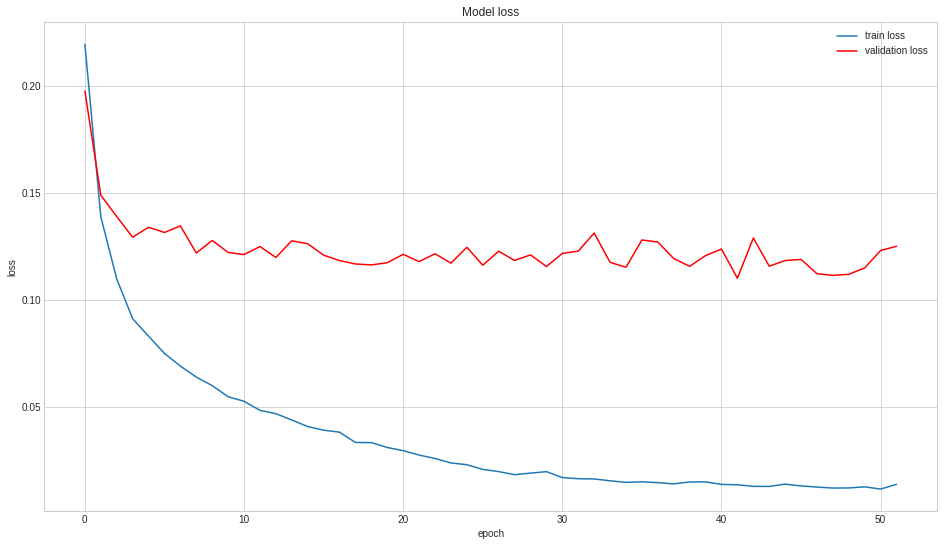

<Figure size 1152x648 with 0 Axes>

In [66]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [67]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 13, 64)         1216      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 384)            0         
_________________________________________________________________
gru (GRU)                    (None, 100)               145800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [68]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(1019, 2, 15, 6)
1019


In [69]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.2292298]]


In [70]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [71]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[121.8232]
(1019, 1)


In [72]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83115934]
KGE' is : [0.86149036]
r is : [0.92996878], gamma is : [0.98812047]
KGE is : [0.81083867]
alpha is : [0.87062377], beta is : [0.88109068]
PBIAS is : [11.89093188]
RMSE is : 420.81933211046993
MARE is : [0.20466718]
MSE is : 177088.91027790197
MAE is : 306.1333509561751
MAPE is : inf
R2 is : 0.831159340134251



<ipython-input-72-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


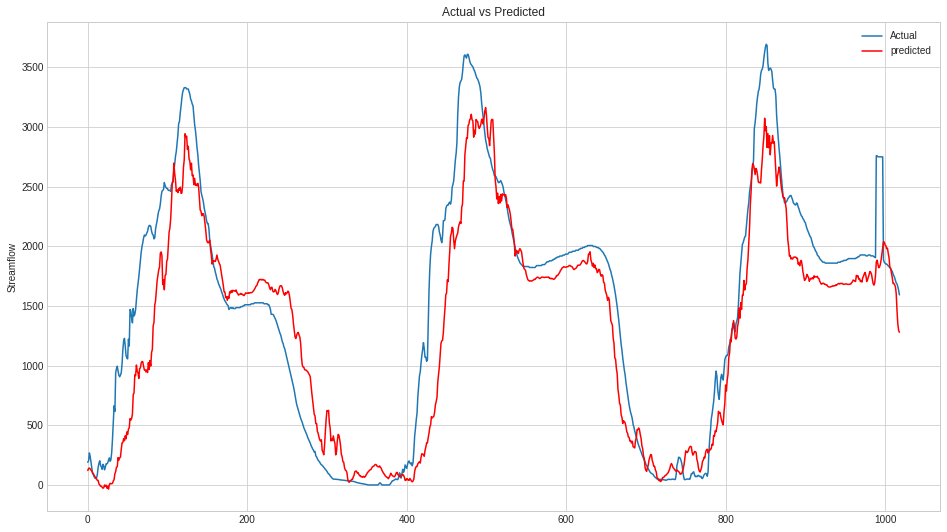

In [73]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [74]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_GRU_Multi_Jiderebode_Q_1step_30days_gpm_tanh_history.csv', index=False)

In [75]:
# 4th Model
# Auto-encoder LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [76]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [77]:
# Define the Auto-encoder LSTM model

# Define the auto-encoder LSTM model.
ED_lstm_model = Sequential([
    LSTM(40, input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,return_sequences=True),
    LSTM(units=25,return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [78]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ED_LSTM_Multi_Jiderebode_Q_1step_30days_gpm_tanh.h5'

In [79]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 10s 25ms/step - loss: 0.6496 - val_loss: 0.2213
Epoch 2/100
150/150 [==============================] - 2s 13ms/step - loss: 0.1536 - val_loss: 0.1378
Epoch 3/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0925 - val_loss: 0.1269
Epoch 4/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0643 - val_loss: 0.1411
Epoch 5/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0522 - val_loss: 0.1184
Epoch 6/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0415 - val_loss: 0.1420
Epoch 7/100
150/150 [==============================] - 2s 14ms/step - loss: 0.0372 - val_loss: 0.1399
Epoch 8/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0309 - val_loss: 0.1450
Epoch 9/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0271 - val_loss: 0.1373
Epoch 10/100
150/150 [==============================] - 2s 13ms/step - loss: 0.02

In [80]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

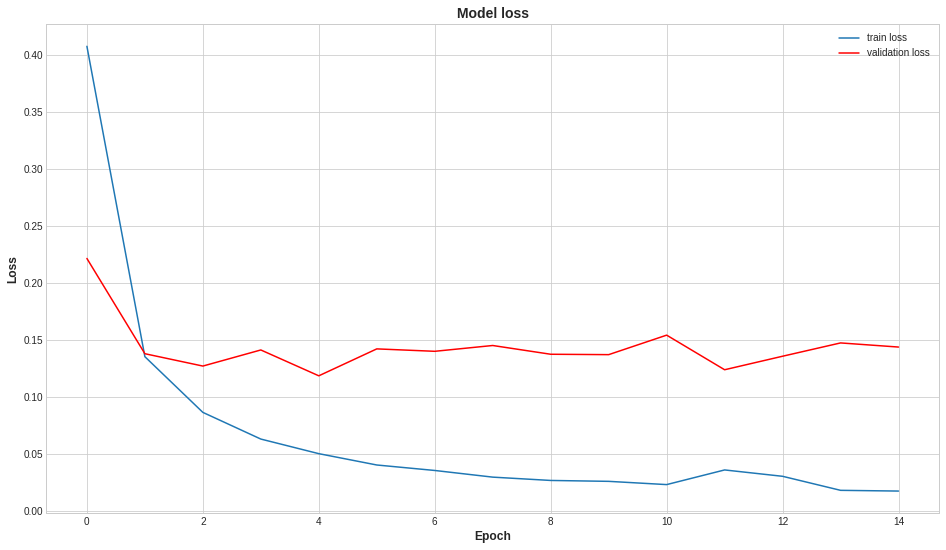

<Figure size 1152x648 with 0 Axes>

In [81]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [82]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 40)            7520      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [83]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[-1.2631204]]]


In [84]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [85]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[92.067215]
(1019, 1)
1019


In [86]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83880557]
KGE' is : [0.88567483]
r is : [0.9244939], gamma is : [0.9950403]
KGE is : [0.85443924]
alpha is : [0.90976536], beta is : [0.91430009]
PBIAS is : [8.56999136]
RMSE is : 411.1801837352742
MARE is : [0.19717738]
MSE is : 169069.14349657387
MAE is : 294.93038920919565
MAPE is : inf
R2 is : 0.838805571133154



<ipython-input-86-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


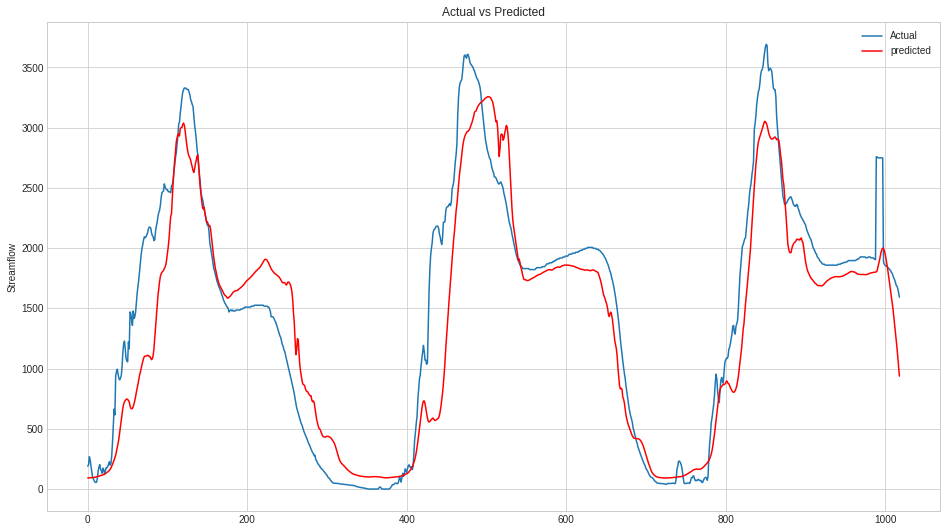

In [87]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [88]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ED_LSTM_Multi_Jiderebode_Q_1step_30days_gpm_history.csv', index=False)

In [89]:
# 5th Model
# CNN Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [90]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [91]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [92]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_Multi_Jiderebode_Q_1step_30days_gpm.h5'

In [93]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 3s 12ms/step - loss: 0.2983 - val_loss: 0.1778
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1696 - val_loss: 0.1565
Epoch 3/100
150/150 [==============================] - 1s 3ms/step - loss: 0.1322 - val_loss: 0.1426
Epoch 4/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1164 - val_loss: 0.1708
Epoch 5/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.1431
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0980 - val_loss: 0.1513
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0943 - val_loss: 0.1350
Epoch 8/100
150/150 [==============================] - 1s 3ms/step - loss: 0.0866 - val_loss: 0.1396
Epoch 9/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0849 - val_loss: 0.1321
Epoch 10/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0803 - val_l

In [94]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

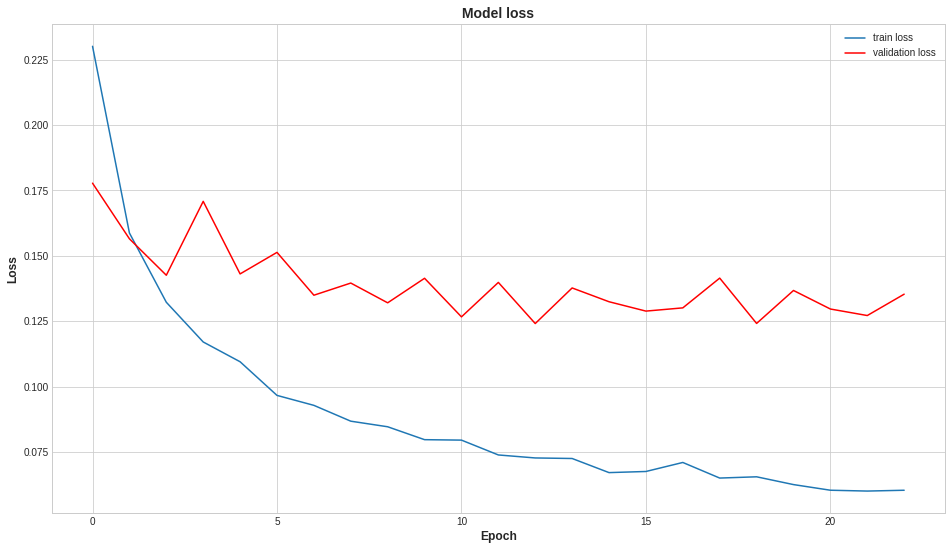

<Figure size 1152x648 with 0 Axes>

In [95]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [96]:
# Check the model summary
Trained_model.summary()

# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(y_test_multi))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 64)            1216      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                26910     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [97]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.3283864]]


In [98]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [99]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[34.763504]
(1019, 1)
1019


In [100]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81590882]
KGE' is : [0.85390762]
r is : [0.92299049], gamma is : [0.97811569]
KGE is : [0.79785721]
alpha is : [0.85858697], beta is : [0.87779691]
PBIAS is : [12.22030909]
RMSE is : 439.41376500947797
MARE is : [0.22520031]
MSE is : 193084.45687980473
MAE is : 336.8460211041563
MAPE is : inf
R2 is : 0.8159088163214361



<ipython-input-100-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


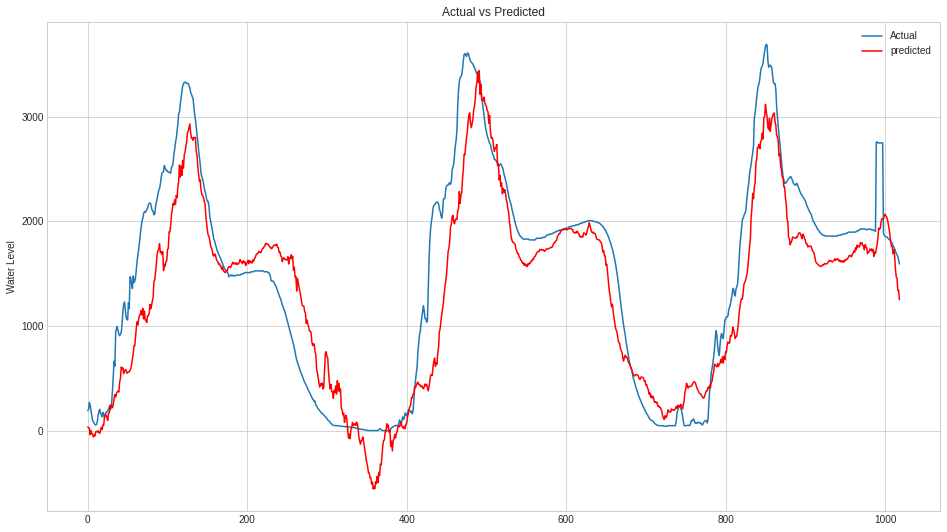

In [101]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [102]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_Multi_Jiderebode_Q_1step_30days_gpm_history.csv', index=False)

In [103]:
# 6th Model
# LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [104]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [105]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [106]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/LSTM_Multi_Jiderebode_Q_1step_30days_gpm.h5'

In [107]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 6s 26ms/step - loss: 0.2455 - val_loss: 0.2204
Epoch 2/100
150/150 [==============================] - 3s 17ms/step - loss: 0.1507 - val_loss: 0.1280
Epoch 3/100
150/150 [==============================] - 3s 17ms/step - loss: 0.1008 - val_loss: 0.1622
Epoch 4/100
150/150 [==============================] - 3s 17ms/step - loss: 0.0759 - val_loss: 0.1271
Epoch 5/100
150/150 [==============================] - 3s 17ms/step - loss: 0.0587 - val_loss: 0.1302
Epoch 6/100
150/150 [==============================] - 3s 17ms/step - loss: 0.0516 - val_loss: 0.1427
Epoch 7/100
150/150 [==============================] - 3s 17ms/step - loss: 0.0470 - val_loss: 0.1118
Epoch 8/100
150/150 [==============================] - 3s 17ms/step - loss: 0.0478 - val_loss: 0.1186
Epoch 9/100
150/150 [==============================] - 3s 18ms/step - loss: 0.0407 - val_loss: 0.1119
Epoch 10/100
150/150 [==============================] - 3s 17ms/step - loss: 0.037

In [108]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

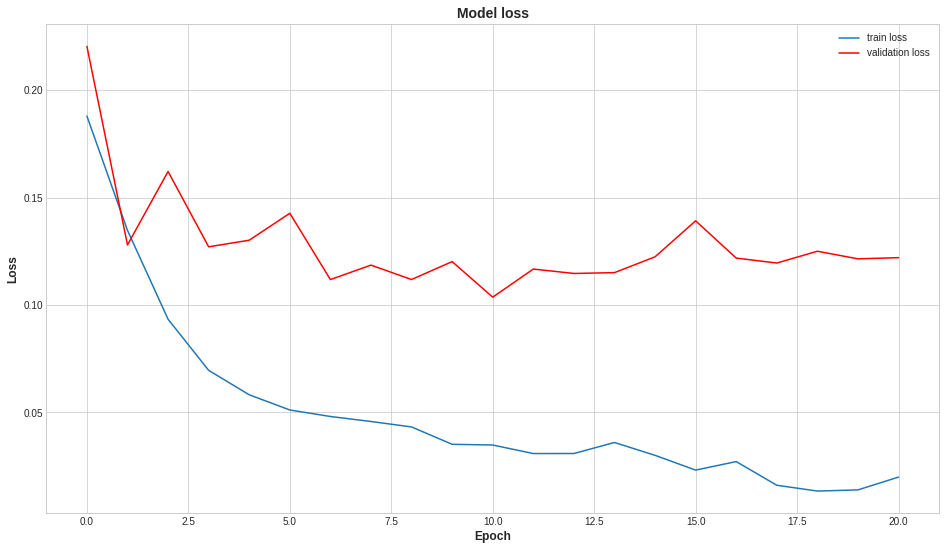

<Figure size 1152x648 with 0 Axes>

In [109]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [110]:
# Check the model summary
Trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 150)           94200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 194,701
Trainable params: 194,701
Non-trainable params: 0
_________________________________________________________________


In [111]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.2199495]]


In [112]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [113]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[129.97139]
(1019, 1)
1019


In [114]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.82745877]
KGE' is : [0.86114793]
r is : [0.92630241], gamma is : [1.00959536]
KGE is : [0.82384887]
alpha is : [0.89118183], beta is : [0.88271193]
PBIAS is : [11.7288071]
RMSE is : 425.4059937454313
MARE is : [0.20357718]
MSE is : 180970.25951453796
MAE is : 304.5029620219209
MAPE is : inf
R2 is : 0.8274587720678789



<ipython-input-114-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


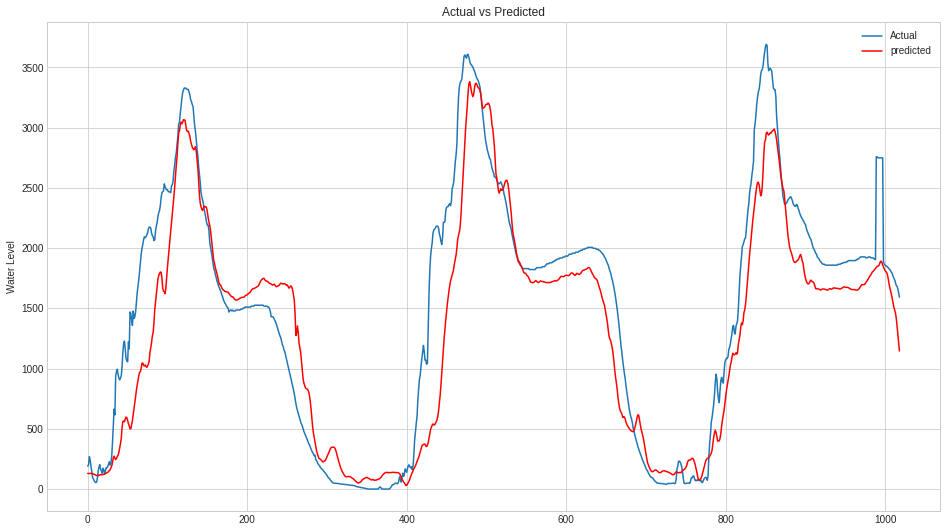

In [115]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [116]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/LSTM_Multi_Jiderebode_Q_1step_30days_gpm_history.csv', index=False)

In [117]:
# 7th Model
# GRU Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [118]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [119]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/GRU_Multi_Jiderebode_Q_1step_30days_gpm.h5'

In [120]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 5s 17ms/step - loss: 0.2768 - val_loss: 0.2182
Epoch 2/100
150/150 [==============================] - 2s 11ms/step - loss: 0.1651 - val_loss: 0.1904
Epoch 3/100
150/150 [==============================] - 2s 11ms/step - loss: 0.1267 - val_loss: 0.1716
Epoch 4/100
150/150 [==============================] - 2s 11ms/step - loss: 0.1060 - val_loss: 0.1221
Epoch 5/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0905 - val_loss: 0.1381
Epoch 6/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0759 - val_loss: 0.1220
Epoch 7/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0644 - val_loss: 0.1260
Epoch 8/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0549 - val_loss: 0.1373
Epoch 9/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0557 - val_loss: 0.1273
Epoch 10/100
150/150 [==============================] - 2s 12ms/step - loss: 0.047

In [121]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

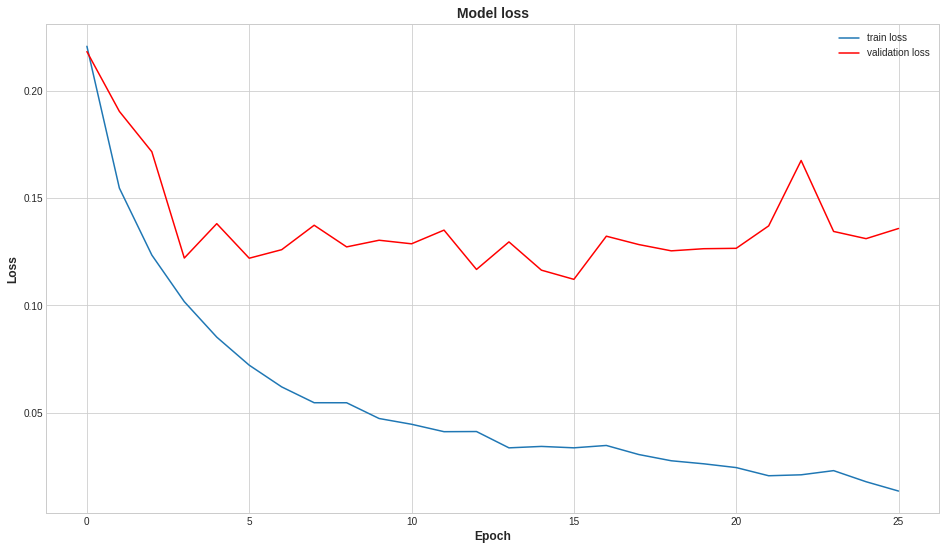

<Figure size 1152x648 with 0 Axes>

In [122]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [123]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 30, 100)           32400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 55,251
Trainable params: 55,251
Non-trainable params: 0
_________________________________________________________________


In [124]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.2963986]]


In [125]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [126]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[62.84883]
(1019, 1)
1019


In [127]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.79573052]
KGE' is : [0.8333489]
r is : [0.91550007], gamma is : [1.03301102]
KGE is : [0.80228169]
alpha is : [0.8886013], beta is : [0.86020507]
PBIAS is : [13.97949324]
RMSE is : 462.8698561951764
MARE is : [0.22030253]
MSE is : 214248.50377414326
MAE is : 329.5200982068023
MAPE is : inf
R2 is : 0.7957305248775383



<ipython-input-127-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


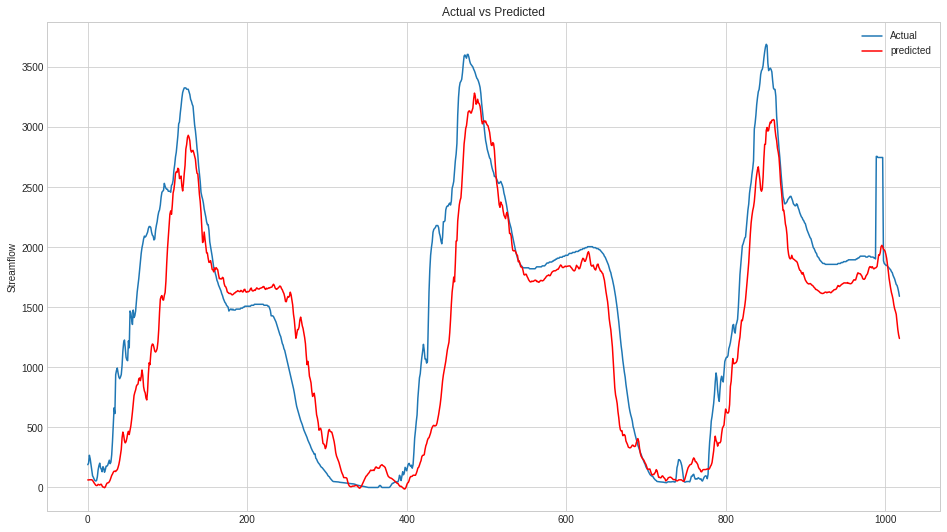

In [128]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [129]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/GRU_Multi_Jiderebode_Q_1step_30days_gpm_history.csv', index=False)

In [130]:
# 8th Model Bidirectional LSTM

# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [131]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [132]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [133]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_Q_1step_30days_gpm.h5'

In [134]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 11s 44ms/step - loss: 0.2819 - val_loss: 0.1728
Epoch 2/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1480 - val_loss: 0.1229
Epoch 3/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1083 - val_loss: 0.1308
Epoch 4/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0959 - val_loss: 0.1306
Epoch 5/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0762 - val_loss: 0.1280
Epoch 6/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0708 - val_loss: 0.1378
Epoch 7/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0658 - val_loss: 0.1752
Epoch 8/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0697 - val_loss: 0.1588
Epoch 9/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0619 - val_loss: 0.1197
Epoch 10/100
150/150 [==============================] - 5s 31ms/step - loss: 0.05

In [135]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

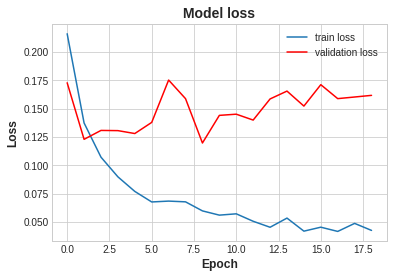

<Figure size 1152x648 with 0 Axes>

In [136]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [137]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 30, 300)           188400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 330,841
Trainable params: 330,841
Non-trainable params: 0
_________________________________________________________________


In [138]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-1.1810955]]


In [139]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1019, 1)


In [140]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[164.08528]
(1019, 1)


In [141]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81402153]
KGE' is : [0.85907239]
r is : [0.91467379], gamma is : [0.93726738]
KGE is : [0.80407093]
alpha is : [0.85012341], beta is : [0.90702341]
PBIAS is : [9.29765876]
RMSE is : 441.6604397500701
MARE is : [0.2166581]
MSE is : 195063.9440402253
MAE is : 324.0689119754015
MAPE is : inf
R2 is : 0.8140215275135897



<ipython-input-141-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


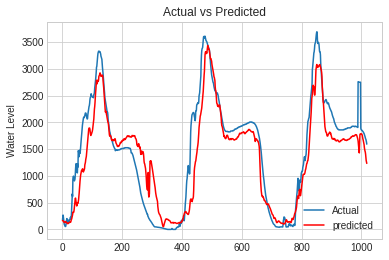

In [142]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [143]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_Q_1step_30days_gpm_tanh_history.csv', index=False)

In [146]:
# import pickle
from pickle import dump

In [148]:
# save the scaler
dump(scaler, open('/home/jefire/project/water/models/jiderebode_models/jide_q/scalers/jiderebode_q_imerge_data_2001_2020_70to30split_scaler.pkl', 'wb'))

In [149]:
# save the pipeline
dump(pipe, open('/home/jefire/project/water/models/jiderebode_models/jide_q/scalers/jiderebode_q_imerge_data_2001_2020_70to30split_pipe.pkl', 'wb'))